In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('mtcars.csv')
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [3]:
df.shape

(32, 12)

In [4]:
df.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

- There are no missing values

In [5]:
df = df.drop('model',1)
df.shape

(32, 11)

- Dropped the column model as it's not significant for preparing the model.

### Chceking the features distribution

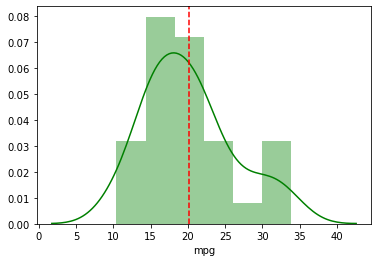

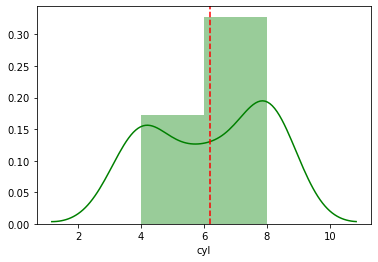

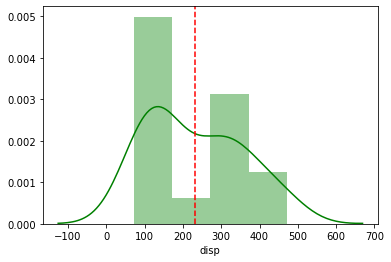

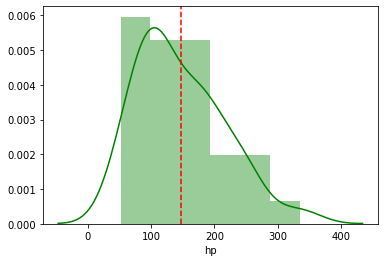

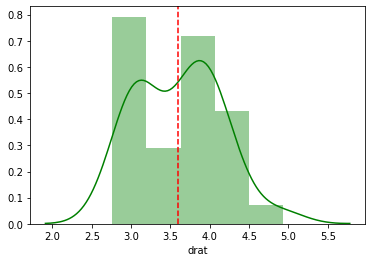

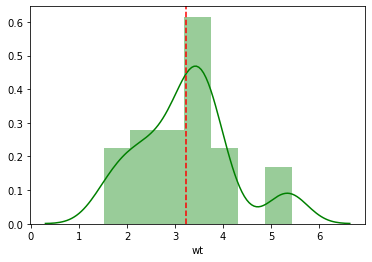

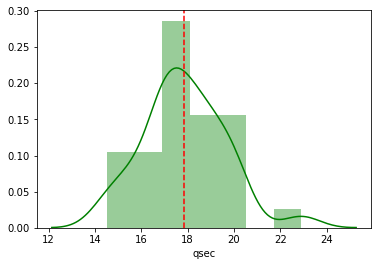

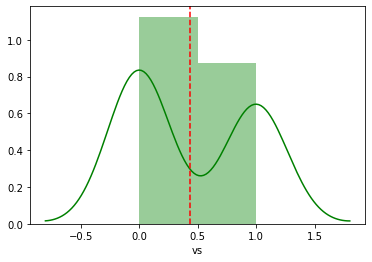

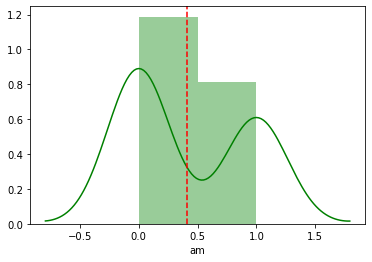

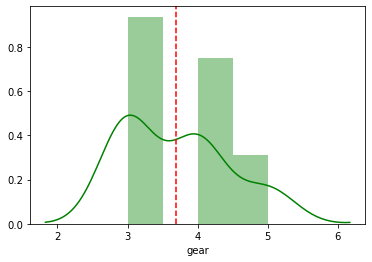

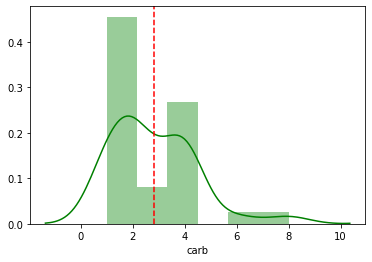

In [6]:
for i in df:
    sns.distplot(df[i], color='g')
    plt.axvline(df[i].mean(), color='r', linestyle='--')
    plt.show()

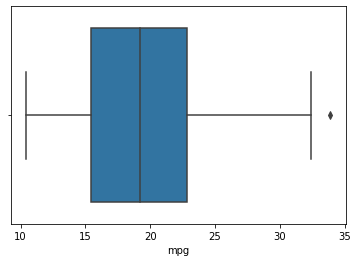

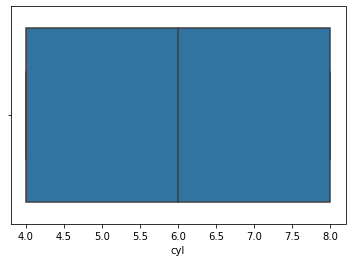

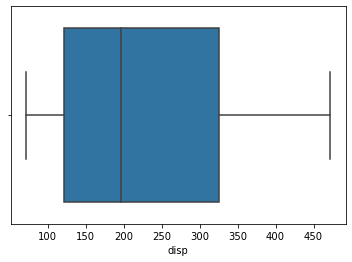

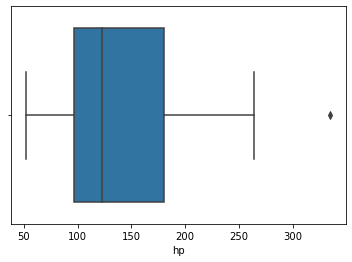

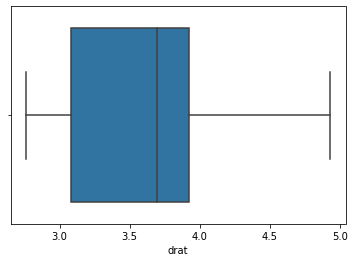

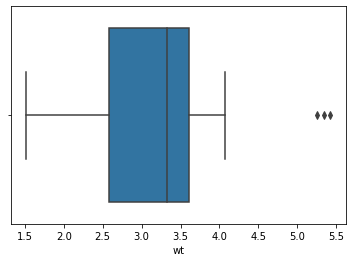

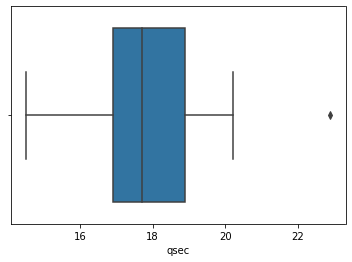

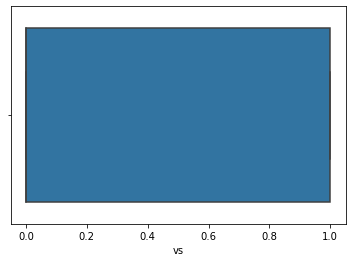

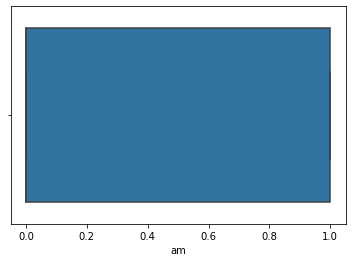

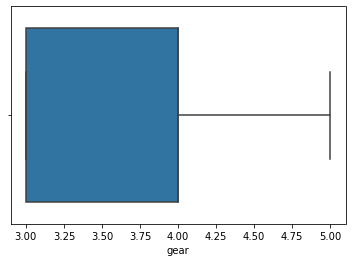

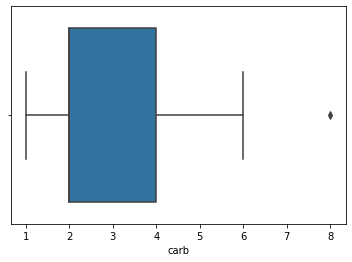

In [7]:
### Chceking if the dataset has outliers

for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

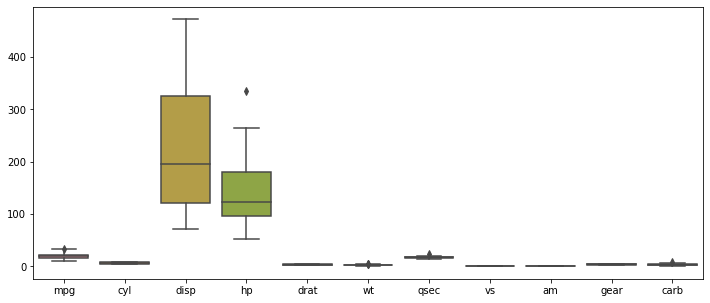

In [8]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df)
plt.show()

-There are outliers in the dataset.

In [9]:
df.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear',
       'carb'],
      dtype='object')

### Building the Model without Outliers Treatment

In [10]:
# Defining the independant and the dependent features

X = df.drop('mpg', axis=1)
y = df['mpg']

#### Splitting the data

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Building OLS Model

In [13]:
import statsmodels.api as sm

In [14]:
Xc = sm.add_constant(X)
model = sm.OLS(y, Xc).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     13.93
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           3.79e-07
Time:                        17:42:48   Log-Likelihood:                -69.855
No. Observations:                  32   AIC:                             161.7
Df Residuals:                      21   BIC:                             177.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3034     18.718      0.657      0.5

- Based on the Durbin-Watson test we can interpret that there is almost no auto correlation.

#### Checking the model performance measure

In [15]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
y_pred = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

print("R^2 score for train: {}".format(lin_reg.score(X_train, y_train)))
print("R^2 score for test: {}".format(lin_reg.score(X_test, y_test)))

R^2 score for train: 0.8609650315534105
R^2 score for test: 0.8869538413492843


In [16]:
print(f'Coefficients: {lin_reg.coef_}')
print(f'Intercept: {lin_reg.intercept_}')
print(f'R^2 score: {lin_reg.score(X, y)}')

Coefficients: [-0.11144048  0.01333524 -0.02148212  0.78711097 -3.71530393  0.82104075
  0.31776281  2.52022689  0.65541302 -0.19941925]
Intercept: 12.303374155996305
R^2 score: 0.8690157644777647


In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y_test, y_pred))
print(np.sqrt(mean_squared_error(y_test, y_pred)))

1.5150367191771092
1.9601015413797032


## Assumptions Of Linear Regression

#### 1. No Autocorrelation

<ipython-input-18-3374cb46d92d>:4: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


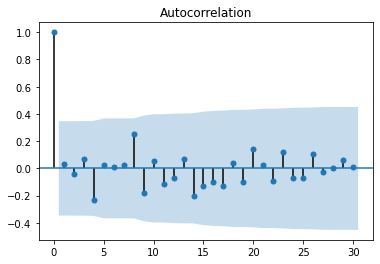

In [18]:
import statsmodels.tsa.api as smt

acf = smt.graphics.plot_acf(model.resid, lags=30, alpha=0.05)
acf.show()

- Based on the plot and the Durbin Watson test there is a bit of positive correlation.

### 2. Linearity in Residuals

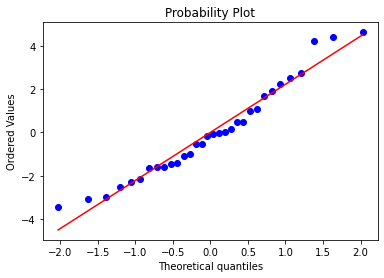

In [19]:
from scipy import stats
stats.probplot(model.resid, plot=plt)
plt.show()

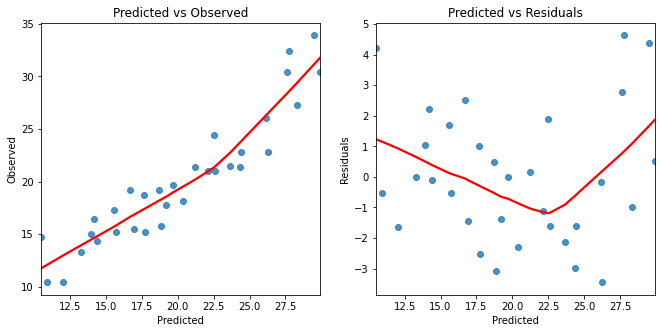

In [20]:
fitted_vals = model.predict()
resids = model.resid

fig, ax = plt.subplots(1,2, figsize=(11,5))

sns.regplot(x=fitted_vals, y=y, ax=ax[0], lowess=True, line_kws={'color':'red'})
ax[0].set_title("Predicted vs Observed")
ax[0].set(xlabel='Predicted', ylabel='Observed')

sns.regplot(x=fitted_vals, y=resids, ax=ax[1], lowess=True, line_kws={'color':'red'})
ax[1].set_title("Predicted vs Residuals")
ax[1].set(xlabel='Predicted', ylabel='Residuals')
plt.show()

In [21]:
from statsmodels.compat import lzip
import statsmodels.api as sm

name = ['F-statistics', 'p-value']
test = sm.stats.linear_rainbow(res=model, frac=0.5)
print(lzip(name, test))

[('F-statistics', 3.857711147953162), ('p-value', 0.07119712038953625)]


Since p-val> 0.05, we'll accept null hypothesis and conclude that there is linearity in residuals.

### 3.Normality in Residuals

In [22]:
from scipy import stats
stats.jarque_bera(model.resid)

Jarque_beraResult(statistic=1.7466576018548121, pvalue=0.41755926155190337)

- Since p-val is greator than 0.05, so we'll accept the null hypothesis and conclude that the residuals are normally distributed.

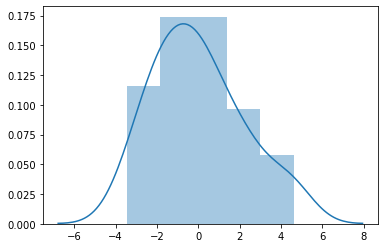

In [23]:
sns.distplot(model.resid)
plt.show()

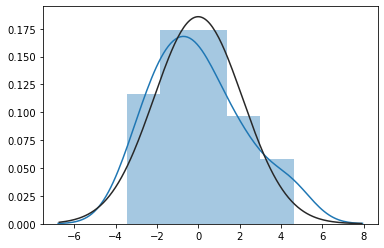

In [24]:
from scipy.stats import norm
norm.fit(model.resid)
sns.distplot(model.resid, fit=norm)
plt.show()

### 4. Homoscedasticity

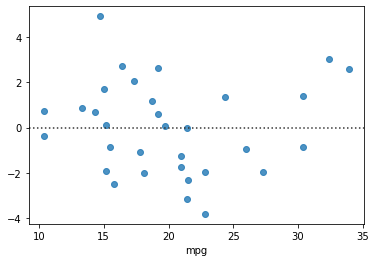

In [25]:
sns.residplot(y, model.resid)
plt.show()

In [26]:
import statsmodels.stats.api as sms

name = ['F-statistics', 'p-value']
test = sms.het_goldfeldquandt(model.resid, model.model.exog)

print(lzip(name, test))

[('F-statistics', 28.863993040889987), ('p-value', 0.001074898144721464)]


- Since p-val is greator than 0.05, so we'll accept the null hypothesis and conclude that the residuals are uniformally distributed.

### 5. No Multicollinearity

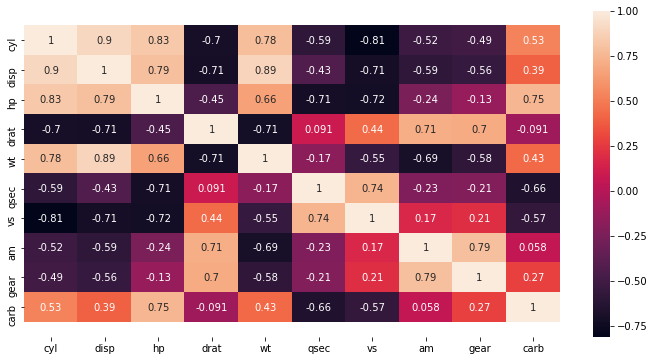

In [27]:
# Checking the correlation of the independent features

plt.figure(figsize=(12,6))
ax = sns.heatmap(X.corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)
plt.show()

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [29]:
pd.DataFrame([vif(Xc.values, i) for i in range(Xc.shape[1])], index=Xc.columns, columns=['Vif_value'])

,Vif_value
const,1596.273030
cyl,15.373833
disp,21.620241
hp,9.832037
drat,3.374620
wt,15.164887
qsec,7.527958
vs,4.965873
am,4.648487
gear,5.357452


- Based on the Vif values, there seem to be multicollinearity.

In [30]:
Xc1 = X.drop('disp', axis=1)

In [31]:
pd.DataFrame([vif(Xc1.values,i) for i in range(Xc1.shape[1])], index=Xc1.columns, columns=['vif_value'])

,vif_value
cyl,96.707994
hp,40.467587
drat,129.763464
wt,74.211685
qsec,259.663980
vs,8.661065
am,7.407920
gear,118.749935
carb,17.258037


- By removing the highest vif value feature the collinearity increases, we'll continue using the earlier features.

### Ridge Regularisation

In [32]:
from sklearn.linear_model import Ridge, RidgeCV

In [33]:
alphas = np.logspace(0.00001, 1, 200)

ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([ 1.00002303,  1.01166116,  1.02343473,  1.03534532,  1.04739453,
        1.05958396,  1.07191526,  1.08439006,  1.09701004,  1.10977689,
        1.12269233,  1.13575806,  1.14897586,  1.16234748,  1.17587472,
        1.18955939,  1.20340332,  1.21740836,  1.2315764 ,  1.24590931,
        1.26040903,  1.2750775 ,  1.28991668,  1.30492855,  1.32011513,
        1.33547845,  1.35102056,  1.36674356,  1.38264953,  1.39874062,...
        6.7475706 ,  6.8260979 ,  6.90553909,  6.9859048 ,  7.06720581,
        7.14945298,  7.23265733,  7.31683   ,  7.40198227,  7.48812552,
        7.5752713 ,  7.66343126,  7.75261722,  7.84284112,  7.93411503,
        8.02645117,  8.1198619 ,  8.21435974,  8.30995733,  8.40666748,
        8.50450312,  8.60347736,  8.70360345,  8.80489479,  8.90736495,
        9.01102764,  9.11589674,  9.22198629,  9.3293105 ,  9.43788374,
        9.54772053,  9.65883559,  9.7712438 ,  9.88496019, 10.        ]),
        cv=3, scoring='r2')

In [34]:
ridge_cv.alpha_

4.448818864392709

In [35]:
ridge_cv.coef_

array([-0.50227122, -0.00675384, -0.01537584,  0.6404558 , -1.47504103,
        0.02156638,  0.12309122,  0.99847705,  0.73353664, -0.7011099 ])

In [36]:
from sklearn.metrics import r2_score, mean_squared_error

In [37]:
ridge = Ridge(alpha = ridge_cv.alpha_, random_state=3)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)
print("R-squared of train: {}".format(r2_score(y_train, y_train_pred)))
print("R-squared of test: {}".format(r2_score(y_test, y_pred)))

R-squared of train: 0.8440393008423834
R-squared of test: 0.8265268807428914


- Ridge Regularisation doesn't help in improving the r-square value.

### Lasso Regularisation

In [38]:
from sklearn.linear_model import Lasso, LassoCV

In [39]:
alphas = np.linspace(0.00001, 1, 100)
lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=3)
lasso_cv.fit(X, y)

LassoCV(alphas=array([1.00000000e-05, 1.01109091e-02, 2.02118182e-02, 3.03127273e-02,
       4.04136364e-02, 5.05145455e-02, 6.06154545e-02, 7.07163636e-02,
       8.08172727e-02, 9.09181818e-02, 1.01019091e-01, 1.11120000e-01,
       1.21220909e-01, 1.31321818e-01, 1.41422727e-01, 1.51523636e-01,
       1.61624545e-01, 1.71725455e-01, 1.81826364e-01, 1.91927273e-01,
       2.02028182e-01, 2.12129091e-0...
       7.67679091e-01, 7.77780000e-01, 7.87880909e-01, 7.97981818e-01,
       8.08082727e-01, 8.18183636e-01, 8.28284545e-01, 8.38385455e-01,
       8.48486364e-01, 8.58587273e-01, 8.68688182e-01, 8.78789091e-01,
       8.88890000e-01, 8.98990909e-01, 9.09091818e-01, 9.19192727e-01,
       9.29293636e-01, 9.39394545e-01, 9.49495455e-01, 9.59596364e-01,
       9.69697273e-01, 9.79798182e-01, 9.89899091e-01, 1.00000000e+00]),
        cv=3, random_state=3)

In [40]:
lasso_cv.alpha_

0.20202818181818183

In [41]:
lasso = Lasso(alpha = ridge_cv.alpha_, random_state=3)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
print("R-squared of train: {}".format(r2_score(y_train, y_train_pred)))
print("R-squared of test: {}".format(r2_score(y_test, y_pred)))

R-squared of train: 0.748706023493898
R-squared of test: 0.7288366688710186


- So, both the regularization techniques doesn't help in improving the model r-square values.

### Model buiding after the Outliers Treatment

In [48]:
num_features = df.select_dtypes(include='number')

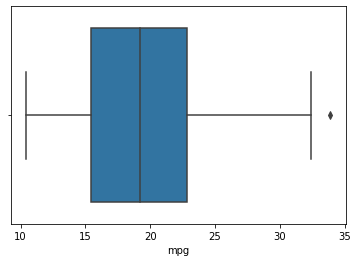

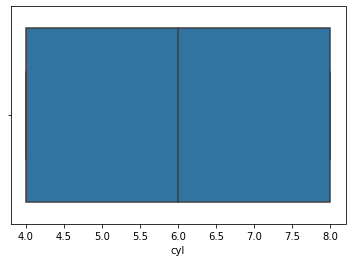

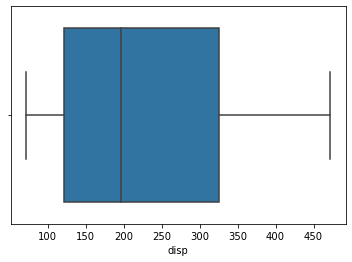

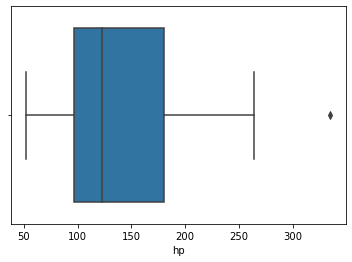

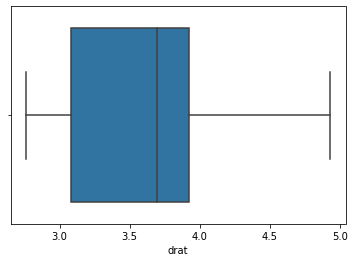

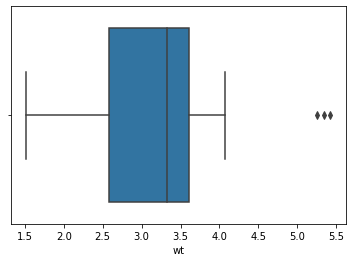

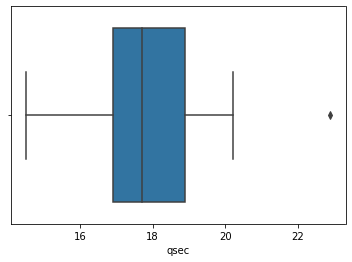

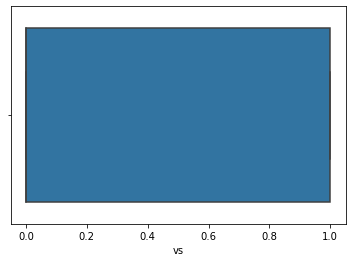

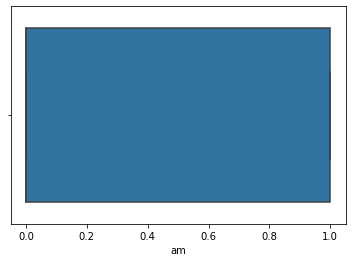

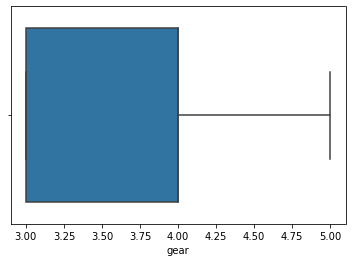

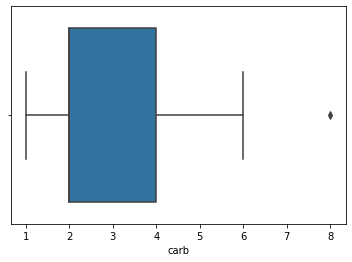

In [49]:
for i in num_features:
    sns.boxplot(df[i])
    plt.show()

- There are outliers in a lot of features.

In [50]:
x = df.describe()
x.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000


In [53]:
for i in num_features:
    q1 = x.loc['25%'][i]
    q3 = x.loc['75%'][i]
    iqr = q3-q1
    uppl = q3 + 1.5*iqr
    lowl = q1 - 1.5*iqr
    df[i] = df[i].apply(lambda x:uppl if x>uppl else x)
    df[i] = df[i].apply(lambda x:lowl if x<lowl else x)

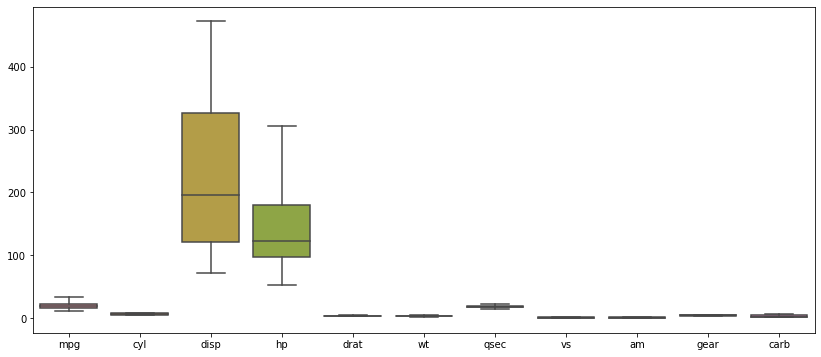

In [54]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df)
plt.show()

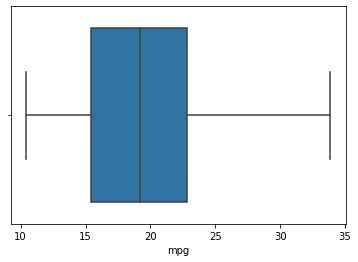

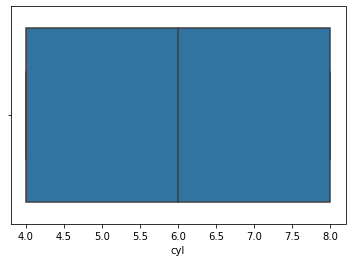

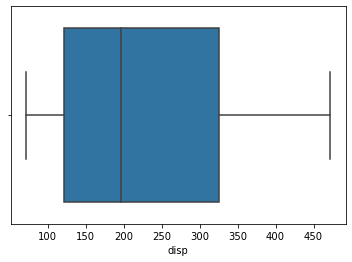

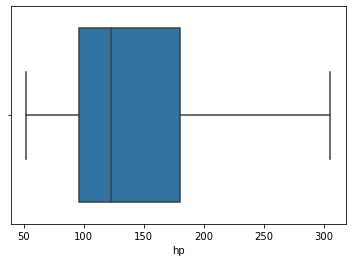

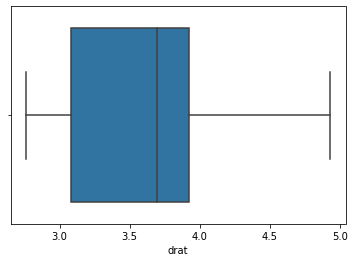

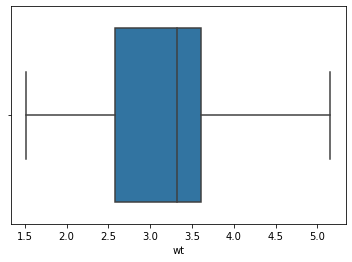

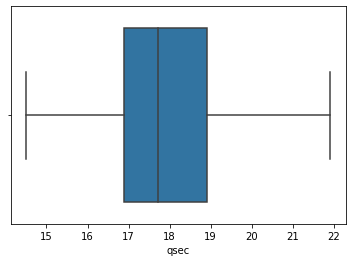

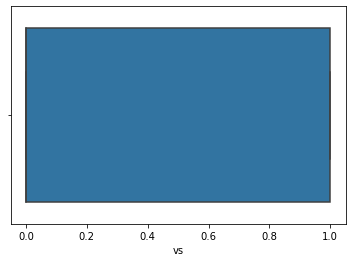

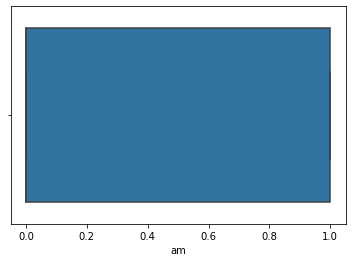

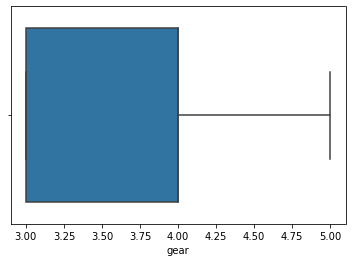

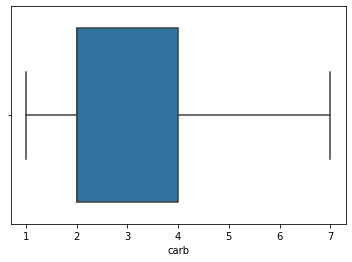

In [55]:
for i in num_features:
    sns.boxplot(df[i])
    plt.show()

- The outliers have been removed.

### Building the models after outliers treatment

In [56]:
X = df.drop('mpg', axis=1)
y = df['mpg']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Building OLS Model

In [59]:
import statsmodels.api as sm

In [61]:
Xc = sm.add_constant(X)
mod2 = sm.OLS(y, Xc).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     14.89
Date:                Mon, 27 Jul 2020   Prob (F-statistic):           2.13e-07
Time:                        17:56:29   Log-Likelihood:                -68.913
No. Observations:                  32   AIC:                             159.8
Df Residuals:                      21   BIC:                             175.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.2971     20.612      0.306      0.7

- The model's R-square value has increased after the outlier's treatment.
- Also based on the Durbin Watson test there's almost no autocorrelation

### Checking the Model Performance

In [62]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred = lin_reg.predict(X_test)
y_pred_train = lin_reg.predict(X_train)

print("R-square for train: {}".format(lin_reg.score(X_train, y_train)))
print("R-square for test: {}".format(lin_reg.score(X_test, y_test)))

R-square for train: 0.8702708346614005
R-square for test: 0.8898897029036036


In [66]:
print("Coefficeints: {}".format(lin_reg.coef_))
print("Intercept: {}".format(lin_reg.intercept_))
print("Overall R-square: {}".format(lin_reg.score(X,y)))

Coefficeints: [ 0.08429442  0.01425419 -0.02098602  0.93680309 -4.36731366  1.12277407
 -0.21434898  2.05649186  0.93113227 -0.1922466 ]
Intercept: 6.297138762728409
Overall R-square: 0.8763921195657585


In [67]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [75]:
print("Mean Absolute Error: {}".format(mean_absolute_error(y_test, y_pred)))
print("Root Mean square error: {}".format(np.sqrt(mean_squared_error(y_test, y_pred))))

Mean Absolute Error: 15.956620733270949
Root Mean square error: 16.778255044336888


- MAE and RMSE have increased after the outliers treatment.

In [76]:
VIF = pd.DataFrame([vif(Xc.values,i) for i in range(Xc.shape[1])], index = Xc.columns, columns=['vif_value'])

In [80]:
VIF.sort_values("vif_value", ascending=False)

,vif_value
const,2053.157503
disp,20.486335
wt,18.230011
cyl,15.134728
qsec,10.710451
hp,9.910179
carb,7.557540
vs,5.464679
gear,5.373063
am,4.597784


- Without the outliers treatment the model performs better.

### Ridge Regularisation

In [81]:
from sklearn.linear_model import Ridge, RidgeCV

In [82]:
alphas = np.logspace(0.0001, 1, 200)

ridge_cv = RidgeCV(alphas=alphas, scoring='r2', cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([ 1.00023029,  1.01186977,  1.02364471,  1.03555667,  1.04760724,
        1.05979805,  1.07213072,  1.0846069 ,  1.09722826,  1.1099965 ,
        1.12291331,  1.13598044,  1.14919963,  1.16257265,  1.17610128,
        1.18978735,  1.20363268,  1.21763912,  1.23180856,  1.24614288,
        1.260644  ,  1.27531388,  1.29015446,  1.30516774,  1.32035573,
        1.33572046,  1.35126398,  1.36698838,  1.38289577,  1.39898826,
        1....
        6.74780951,  6.82633248,  6.90576921,  6.98613033,  7.0674266 ,
        7.14966889,  7.23286822,  7.31703573,  7.40218268,  7.48832047,
        7.57546063,  7.66361482,  7.75279484,  7.84301263,  7.93428028,
        8.02660998,  8.12001411,  8.21450517,  8.31009579,  8.40679879,
        8.50462711,  8.60359383,  8.70371221,  8.80499565,  8.9074577 ,
        9.01111209,  9.11597268,  9.22205352,  9.32936879,  9.43793288,
        9.5477603 ,  9.65886577,  9.77126415,  9.88497048, 10.        ]),
        cv=3, scoring='r2')

In [83]:
ridge_cv.alpha_

3.612710537495407

In [84]:
ridge_cv.coef_

array([-0.3900149 , -0.00472723, -0.01985836,  0.73660746, -1.64557456,
        0.03504661,  0.09982752,  1.02360695,  0.810626  , -0.7653643 ])

In [85]:
ridge = Ridge(alpha = ridge_cv.alpha_, random_state=3)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)
print("R-squared of train: {}".format(r2_score(y_train, y_train_pred)))
print("R-squared of test: {}".format(r2_score(y_test, y_pred)))

R-squared of train: 0.8510982301046843
R-squared of test: 0.8471689834332665


In [86]:
from sklearn.linear_model import Lasso, LassoCV

In [87]:
alphas = np.linspace(0.00001, 1, 100)
lasso_cv = LassoCV(alphas=alphas, cv=3, random_state=3)
lasso_cv.fit(X, y)

F:\Anaconda_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:525: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.3155613928764893, tolerance: 0.10429105059523806
  model = cd_fast.enet_coordinate_descent_gram(


LassoCV(alphas=array([1.00000000e-05, 1.01109091e-02, 2.02118182e-02, 3.03127273e-02,
       4.04136364e-02, 5.05145455e-02, 6.06154545e-02, 7.07163636e-02,
       8.08172727e-02, 9.09181818e-02, 1.01019091e-01, 1.11120000e-01,
       1.21220909e-01, 1.31321818e-01, 1.41422727e-01, 1.51523636e-01,
       1.61624545e-01, 1.71725455e-01, 1.81826364e-01, 1.91927273e-01,
       2.02028182e-01, 2.12129091e-0...
       7.67679091e-01, 7.77780000e-01, 7.87880909e-01, 7.97981818e-01,
       8.08082727e-01, 8.18183636e-01, 8.28284545e-01, 8.38385455e-01,
       8.48486364e-01, 8.58587273e-01, 8.68688182e-01, 8.78789091e-01,
       8.88890000e-01, 8.98990909e-01, 9.09091818e-01, 9.19192727e-01,
       9.29293636e-01, 9.39394545e-01, 9.49495455e-01, 9.59596364e-01,
       9.69697273e-01, 9.79798182e-01, 9.89899091e-01, 1.00000000e+00]),
        cv=3, random_state=3)

In [88]:
lasso_cv.alpha_

0.19192727272727272

In [89]:
lasso = Lasso(alpha = ridge_cv.alpha_, random_state=3)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
print("R-squared of train: {}".format(r2_score(y_train, y_train_pred)))
print("R-squared of test: {}".format(r2_score(y_test, y_pred)))

R-squared of train: 0.7490990823501099
R-squared of test: 0.7304193413713204


So, both the regularization techniques doesn't help in improving the model r-square values.

### Lasso Regression using Gridsearch Cv

In [91]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

F:\Anaconda_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 46.5132068643712, tolerance: 0.10744412499999999
  model = cd_fast.enet_coordinate_descent(
F:\Anaconda_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 55.52992964914323, tolerance: 0.10454866500000001
  model = cd_fast.enet_coordinate_descent(
F:\Anaconda_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 23.338161536581257, tolerance: 0.04554434615384616
  model = cd_fast.enet_coordinate_descent(
F:\Anaconda_3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You mig

{'alpha': 20}
-13.261951297783668


In [95]:
lasso = Lasso(alpha = 20, random_state=3)
lasso.fit(X_train, y_train)
y_train_pred = lasso.predict(X_train)
y_pred = lasso.predict(X_test)
print("R-squared of train: {}".format(r2_score(y_train, y_train_pred)))
print("R-squared of test: {}".format(r2_score(y_test, y_pred)))

R-squared of train: 0.7448705182101075
R-squared of test: 0.6975436271669503


### Ridge Regression using Gridsearch Cv

In [97]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [99]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 5}
-10.087315998384193


In [100]:
ridge = Ridge(alpha = 5, random_state=3)
ridge.fit(X_train, y_train)
y_train_pred = ridge.predict(X_train)
y_pred = ridge.predict(X_test)
print("R-squared of train: {}".format(r2_score(y_train, y_train_pred)))
print("R-squared of test: {}".format(r2_score(y_test, y_pred)))

R-squared of train: 0.8453456877173519
R-squared of test: 0.8424411281420139


### Polynomial

In [101]:
pf = PolynomialFeatures()
Xn = pf.fit_transform(X)

poly_model = sm.OLS(y, Xn).fit()
y_pred = poly_model.predict(Xn)

In [102]:
print(poly_model.rsquared)
print(poly_model.rsquared_adj)

1.0
nan


F:\Anaconda_3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
F:\Anaconda_3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)


In [103]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(mean_absolute_error(y, y_pred))
print(np.sqrt(mean_squared_error(y, y_pred)))

3.9855896361018495e-12
6.1702144280361e-12
